# Quick Guide to Facebook's Prophet Basics
---

## IMPORTANT NOTE:

**You should really read the papaer for Prophet! It is relatively straightforward and has a lot of insight on their techniques on how Prophet works internally!**

Link to paper: https://peerj.com/preprints/3190.pdf

**NOTE: Link to installation instructions:** 
    * https://facebook.github.io/prophet/docs/installation.html#python 

## Load Data

The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [2]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/timeseries/Data/BeerWineLiquor.csv

--2020-10-05 10:04:16--  https://frenzy86.s3.eu-west-2.amazonaws.com/timeseries/Data/BeerWineLiquor.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.148.110
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.148.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4627 (4.5K) [application/vnd.ms-excel]
Saving to: ‘BeerWineLiquor.csv’

BeerWineLiquor.csv  100%[===================>]   4.52K  --.-KB/s    in 0s      

2020-10-05 10:04:16 (141 MB/s) - ‘BeerWineLiquor.csv’ saved [4627/4627]



In [1]:
import pandas as pd
from fbprophet import Prophet

### Beer dataset

In [2]:
df = pd.read_csv('BeerWineLiquor.csv')

In [3]:
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    324 non-null    object
 1   beer    324 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [5]:
df.describe()

,beer
count,324.000000
mean,2972.895062
std,1010.218574
min,1501.000000
25%,2109.000000
50%,2791.000000
75%,3627.250000
max,6370.000000


### Format the Data

In [6]:
df.columns = ['ds','y']

In [7]:
df['ds'] = pd.to_datetime(df['ds'])

## Create and Fit Model

In [8]:
# This is fitting on all the data (no train test split in this example)
m = Prophet()
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Forecasting

### Step 1: Create "future" placeholder dataframe

**NOTE: Prophet by default is for daily data. You need to pass a frequency for sub-daily or monthly data. Info: https://facebook.github.io/prophet/docs/non-daily_data.html**

In [9]:
future = m.make_future_dataframe(periods=24,freq = 'MS')

In [10]:
df.tail()

,ds,y
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130
323,2018-12-01,6370


In [11]:
future.tail(25)

,ds
323,2018-12-01
324,2019-01-01
325,2019-02-01
326,2019-03-01
327,2019-04-01
328,2019-05-01
329,2019-06-01
330,2019-07-01
331,2019-08-01
332,2019-09-01


In [12]:
len(df)

324

In [13]:
len(future)

348

In [14]:
348-324 # prediction

24


### Step 2: Predict and fill in the Future

In [21]:
forecast = m.predict(future)

In [22]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1774.512619,1146.113762,1483.872342,1774.512619,1774.512619,-461.755050,-461.755050,-461.755050,-461.755050,-461.755050,-461.755050,0.0,0.0,0.0,1312.757569
1,1992-02-01,1777.322689,1195.502529,1498.606647,1777.322689,1777.322689,-427.146658,-427.146658,-427.146658,-427.146658,-427.146658,-427.146658,0.0,0.0,0.0,1350.176031
2,1992-03-01,1779.951464,1442.677161,1759.285187,1779.951464,1779.951464,-178.912314,-178.912314,-178.912314,-178.912314,-178.912314,-178.912314,0.0,0.0,0.0,1601.039150
3,1992-04-01,1782.761533,1422.702941,1735.156635,1782.761533,1782.761533,-196.056786,-196.056786,-196.056786,-196.056786,-196.056786,-196.056786,0.0,0.0,0.0,1586.704747
4,1992-05-01,1785.480956,1672.910376,1998.231204,1785.480956,1785.480956,45.197326,45.197326,45.197326,45.197326,45.197326,45.197326,0.0,0.0,0.0,1830.678281


In [23]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
343,2020-08-01,5200.687845,5089.742564,5408.821930,5188.125744,5213.163016,39.924918,39.924918,39.924918,39.924918,39.924918,39.924918,0.0,0.0,0.0,5240.612763
344,2020-09-01,5216.751615,4928.217439,5239.589968,5203.080264,5230.095279,-133.372206,-133.372206,-133.372206,-133.372206,-133.372206,-133.372206,0.0,0.0,0.0,5083.379410
345,2020-10-01,5232.297199,5027.345152,5350.583069,5217.574844,5246.530853,-43.375085,-43.375085,-43.375085,-43.375085,-43.375085,-43.375085,0.0,0.0,0.0,5188.922115
346,2020-11-01,5248.360970,5170.961781,5491.046095,5232.460498,5263.928615,87.856779,87.856779,87.856779,87.856779,87.856779,87.856779,0.0,0.0,0.0,5336.217749
347,2020-12-01,5263.906554,6168.203245,6501.878565,5246.773059,5280.680326,1070.533455,1070.533455,1070.533455,1070.533455,1070.533455,1070.533455,0.0,0.0,0.0,6334.440008


In [24]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [25]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(25)

,ds,yhat,yhat_lower,yhat_upper
323,2018-12-01,5989.288284,5830.286149,6146.100677
324,2019-01-01,4444.430853,4281.367708,4615.660598
325,2019-02-01,4469.157344,4293.154084,4616.797072
326,2019-03-01,4709.682968,4545.667286,4863.484344
327,2019-04-01,4732.643856,4561.413460,4896.392821
328,2019-05-01,5003.972986,4842.764392,5159.239309
329,2019-06-01,4993.722408,4823.743173,5154.470039
330,2019-07-01,5139.893745,4986.073347,5299.563242
331,2019-08-01,5047.898770,4898.387694,5199.790581
332,2019-09-01,4907.836992,4741.088263,5071.780483


### Plotting Forecast

We can use Prophet's own built in plotting tools

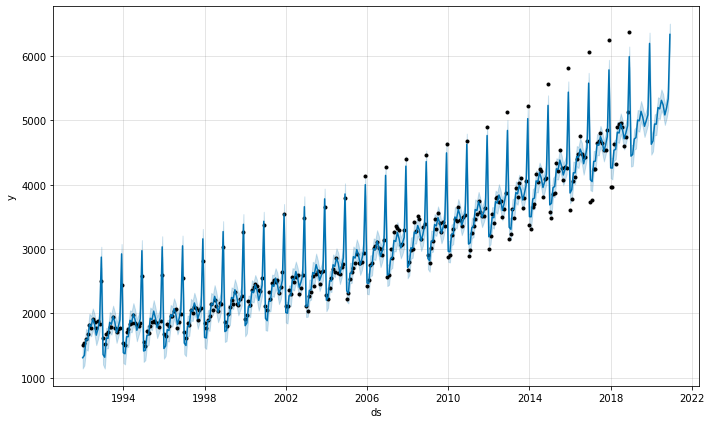

In [26]:
m.plot(forecast);

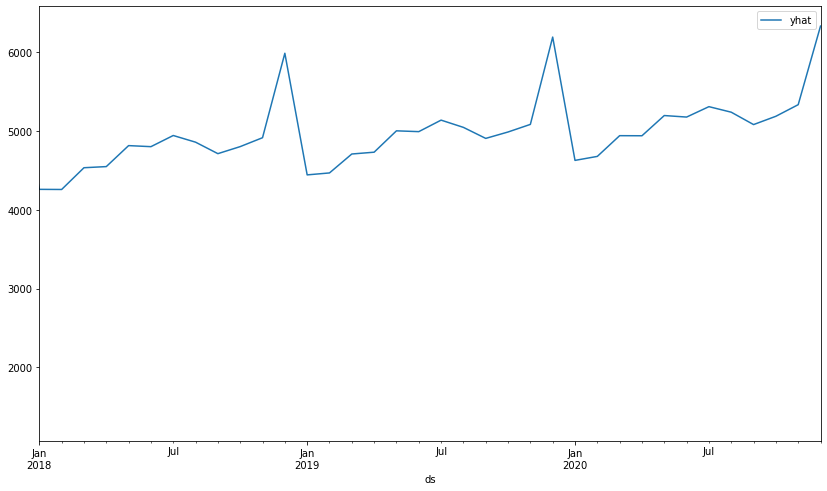

In [27]:
forecast.plot(x='ds',y='yhat',xlim=['2018-01-01','2020-12-01'],figsize=(14,8));

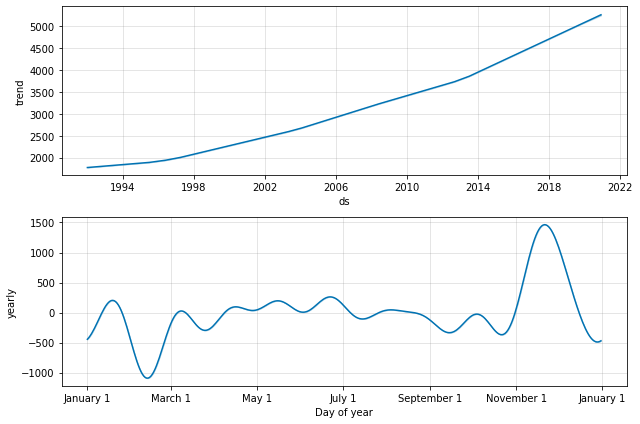

In [28]:
m.plot_components(forecast);